# Anomaly Detection - waterDataTraining set

## Method 1 - Standard Deviation:

In this notebook an anomaly detection algorithm is introduced. In particular, the standard deviation method.

In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations.

<img src="std_method.png" style="width:60%">

Therefore, if you have any data point that is more than 3 times the standard deviation, then those points are very likely to be anomalies or outliers.

### Implementation

In [1]:
# Importing modules
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings  # Used to skip warning messages
import timeit  # Used to take the time for the algorithm to run

warnings.filterwarnings("ignore")

In [2]:
# Reading data set into a pandas data frame
df = pd.read_csv("Water_Example/waterDataTraining.csv", parse_dates=["Time"])

#### Data content overview:

In [3]:
# Information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122334 entries, 0 to 122333
Data columns (total 12 columns):
Id       122334 non-null int64
Time     122334 non-null datetime64[ns]
Tp       110812 non-null float64
Cl       110814 non-null float64
pH       110815 non-null float64
Redox    110815 non-null float64
Leit     110815 non-null float64
Trueb    110815 non-null float64
Cl_2     110815 non-null float64
Fm       110815 non-null float64
Fm_2     110815 non-null float64
EVENT    122334 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 10.4 MB


From the number of non-null values we can see that there are missing values for most of the variables.

In [4]:
# Showing the first 5 rows of the data frame
df.head()

,Id,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT
0,1,2016-02-15 12:54:00,4.4,0.14,8.38,755.0,232.0,0.009,0.110,1428.0,1020.0,False
1,2,2016-02-15 12:55:00,4.4,0.14,8.38,755.0,232.0,0.009,0.111,1436.0,1018.0,False
2,3,2016-02-15 12:56:00,4.4,0.14,8.38,755.0,232.0,0.014,0.113,1471.0,1019.0,False
3,4,2016-02-15 12:57:00,4.4,0.14,8.37,755.0,232.0,0.015,0.111,1457.0,1015.0,False
4,5,2016-02-15 12:58:00,4.4,0.14,8.38,755.0,232.0,0.013,0.111,1476.0,1019.0,False


In [5]:
# Desctiption of the data frame (analogus to summary() in R)
df.describe()

,Id,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2
count,122334.000000,110812.000000,110814.000000,110815.000000,110815.000000,110815.000000,110815.000000,110815.000000,110815.000000,110815.000000
mean,61167.500000,4.567565,0.138432,8.369319,753.422092,220.801424,0.016335,0.097678,1463.273772,939.937698
std,35314.928253,0.455927,0.008487,0.214405,23.570613,18.309438,0.008463,0.011445,146.238918,102.770124
min,1.000000,3.600000,0.000000,4.000000,300.000000,0.000000,0.000000,0.000000,1052.000000,479.000000
25%,30584.250000,4.100000,0.130000,8.290000,752.000000,212.000000,0.013000,0.091000,1362.000000,879.000000
50%,61167.500000,4.700000,0.140000,8.390000,758.000000,216.000000,0.016000,0.095000,1457.000000,942.000000
75%,91750.750000,4.900000,0.140000,8.460000,760.000000,235.000000,0.019000,0.103000,1555.000000,1001.000000
max,122334.000000,10.100000,0.181165,8.755965,894.000000,2500.000000,0.500000,1.000000,2070.000000,1248.000000


In [6]:
# Checking variable types
df.dtypes

Id                int64
Time     datetime64[ns]
Tp              float64
Cl              float64
pH              float64
Redox           float64
Leit            float64
Trueb           float64
Cl_2            float64
Fm              float64
Fm_2            float64
EVENT              bool
dtype: object

In [7]:
# Showing a bunch of missing values
df[29806:29811]

,Id,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT
29806,29807,2016-03-07 05:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
29807,29808,2016-03-07 05:41:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
29808,29809,2016-03-07 05:42:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
29809,29810,2016-03-07 05:43:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
29810,29811,2016-03-07 05:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


As shown in the above table, we cannot get any information about the rows containing missing values. Hence, we drop rows, inplace, containing missing values.

In [8]:
df.dropna(inplace=True)

# Checking data entries left
len(df.index)

110812

In [9]:
# Storing data frame columns as pandas Serie variables
time = df["Time"]
tp = df["Tp"]
cl = df["Cl"]
ph = df["pH"]
redox = df["Redox"]
leit = df["Leit"]
trueb = df["Trueb"]
cl_2 = df["Cl_2"]
fm = df["Fm"]
fm_2 = df["Fm_2"]

# Creating a list called 'columns' to loop through
columns = [tp, cl, ph, redox, leit, trueb, cl_2, fm, fm_2]

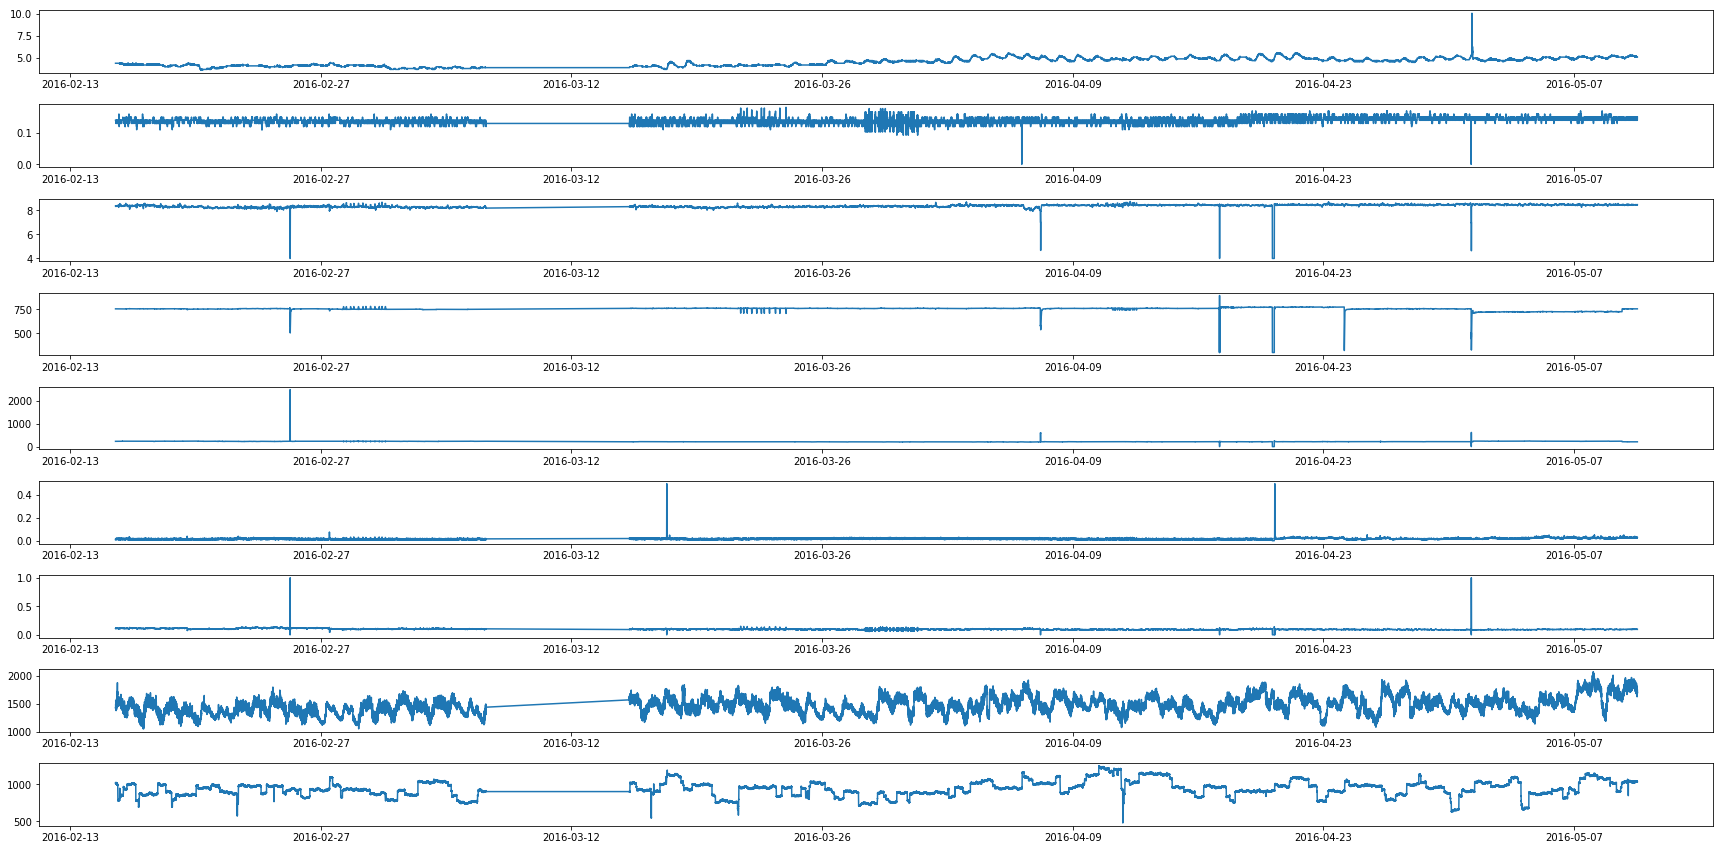

In [10]:
%matplotlib inline

# Plotting specifications to plot all the data frame variables
plt.figure(figsize=(30, 15))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns):
    figure = plt.subplot(9, 1, i + 1)
    plt.plot(time, col)

plt.show()

#### Algorithm implementation:

In [11]:
data = tp  # Variable we want to look at

# start = start of the window, end = end of the window, period = width of the window
period = 3 * 1440  # 3-day period
start = 0
end = 1  # We first start creating the window. Once the window has been created, start and end will shift simultaneously

In [12]:
# Storing il lists anomaly values and their indexes
anomalies = []
anomalies_index = []

In [13]:
# Storing in lists threshold values (lower and upper) and mean values for plotting purpose
lower_list = []
upper_list = []
mean_values = []

In [14]:
# Function the detects anomalies for a given list/variable and updates lists above defined
def find_anomalies(variable):
    """
    The function detects anomalies based on standard deviation
    :param variable: variable we want to look at
    """
    std = variable.std()
    mean = variable.mean()
    mean_values.append(mean)
    threshold = std * 3  # The threshold is defined as 3 times the standard deviation

    lower_bound = mean - threshold
    lower_list.append(lower_bound)

    upper_bound = mean + threshold
    upper_list.append(upper_bound)

    if variable.iloc[-1] < lower_bound or variable.iloc[-1] > upper_bound:
        anomalies.append(variable.iloc[-1])
        anomalies_index.append(variable.index[-1])

In [15]:
# Starting counting the time for the algorithm to run
start_time = timeit.default_timer()

# The while loop will first build the first window and then move it throughout the all data frame
while end <= len(df.index):  # Iterating until end reaches the last data entry
    if end < period:
        variable = data[start:end]
        find_anomalies(variable)
        end += 1
    else:
        variable = data[start:end]
        find_anomalies(variable)
        start += 1
        end += 1

# Stopping the time
stop_time = timeit.default_timer()

stop_time - start_time

47.2158787

In [16]:
# Checking number of anomalies
len(anomalies)

1860

#### Plotting results:

In [17]:
# Function for plotting
def plot_anomalies(data):
    """
    This function locates the index where an anomaly is found.
    The index is used to retrieve the time at which the anomaly occurs.
    :param data: variable we want to look anomalies for
    :return: NULL (plot with variable and anomalies)
    """
    time_loc = []

    for index in anomalies_index:
        time_loc.append(time[index])

    plt.figure(figsize=(12, 6))
    plt.plot(time[0:end], data[0:end], label="Temperature")
    plt.plot(time[0:end - 1], mean_values[0:end], color='black', linestyle='dashed', linewidth=2, alpha=0.3,
             label="Mean")
    # plt.fill_between(time[0:end - 1], lower_list[0:end], upper_list[0:end], alpha=0.2, label="Threshold area")
    plt.scatter(time_loc, anomalies, color="r", label="Anomaly")
    plt.title('Temperature over Time')
    plt.legend()
    plt.show()

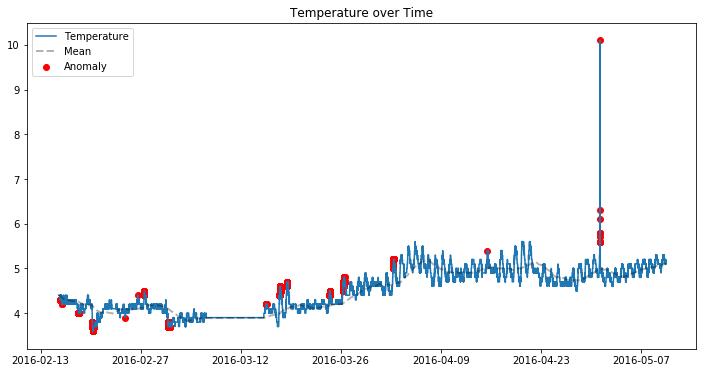

In [18]:
# Calling the plot function above defined
plot_anomalies(data)